<a href="https://colab.research.google.com/github/antsaaims/DSI/blob/main/DSI_preassesment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **DSI PreAssesnment - 2022**

## Antsa Tantely Fandresena Rakotondrafara


My github account : https://github.com/antsaaims


See this file at https://github.com/antsaaims/DSI

## Part 01

**1 Create a hexagon**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random as rnd

In [ ]:
from math import sqrt

In [ ]:
# Creating a regular hexagon

xs=[-1, -1/2, 1/2,1,1/2,-1/2,-1]#x values of the vertices of my hexagon
ys=[0,sqrt(3)/2, sqrt(3)/2,0,- sqrt(3)/2,-sqrt(3)/2,0]#y values of the vertices of my hexagon

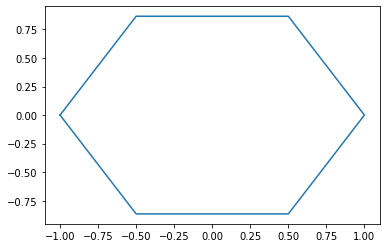

In [ ]:
plt.plot(xs,ys)#ploting my hexagon

2 Pick a random point, P, inside the hexagon.

This is the hardest part of this code so I will do it at the end.

For the question 1 to 4, we will test it with selected points and at the end, after constructing the random point, we will be able to test it. 

Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.

In [ ]:
def hexvertex(i):

  '''This function return a vertex given its range in the list of vertices'''
  return((xs[i%6],ys[i%6]))

In [ ]:
#test
hexvertex(0)#true

(1, 1)

In [ ]:
def triangle(P):
  numvertex=rnd.randint(0,5) # select the first vertices to join with P
  adjacent = numvertex + rnd.choice([-1,1])# select the second vertices to join with
  # P zich should be adjacent to the first one, before or after
  return([P,hexvertex(numvertex),hexvertex(adjacent)]) # list of vertex 

In [ ]:
def showthetriangle(T):
  xt=[]
  yt=[]
  for i in [0,1,2,0]:
    xt.append(T[i][0])#list of xvalues
    yt.append(T[i][1])#list of yvalues
  
  plt.plot(xt,yt)

Let us test if it give us the waited result

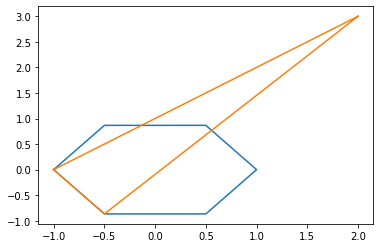

In [ ]:
#test
T=triangle((2,3))
plt.plot(xs,ys)#ploting my hexagon
showthetriangle(T)

Compute the centroid of T

In [ ]:
def centroid(T):
  xG=0
  yG=0
  for i in [0,1,2]:
    xG+=T[i][0]
    yG+=T[i][1]
  return(xG/3,yG/3)

In [ ]:
centroid(T)

(0.16666666666666666, 0.7113248654051872)

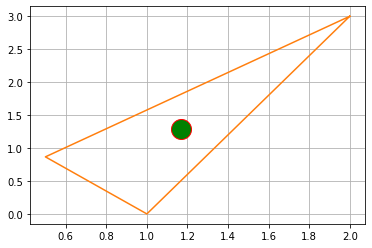

In [ ]:
T=triangle((2,3))
C=centroid(T)
x = C[0]
y = C[1]
plt.grid()
plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
showthetriangle(T)

plt.show()


Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 


In [ ]:
n=10000

In [ ]:
def showshape(P):
  K=P
  xlist=[]#here is where I will store the x vqlues of the random point
  ylist=[]#here is where I will store the x vqlues of the random point
  for i in range(n):
    xlist.append(K[0])#storing the value of x
    ylist.append(K[1])#storing the value of y
    K=centroid(triangle(K))
  plt.plot(xs,ys)#ploting my hexagon  
  plt.scatter(xlist,ylist)#ploting the points
  print(K)  

(-0.6750440604770805, 0.11075191160042934)


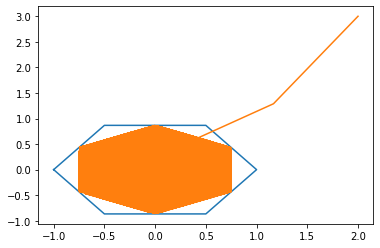

In [ ]:
#showshape((2,3))

(1.774178604756622, 2.859390996687697)


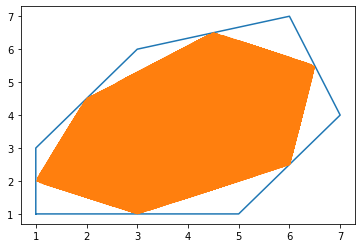

In [ ]:
#showshape((6,5))

Let us now use our random point.

So let me first explain the code :

What I know how to do : 
  - Generate a random number in a given range with the uniform distribution with rnd.uniform()
  - So I can now generate points in a rectangle as it is just a couple of random numbers
  - Then, I can generate random points laying in a given rectangle triangle by using the diagonal symetry of the point if the point generated is in the other part of the rectangle
  - Then, I can generate random points in any given triangles by using an affine function from a rectangle triangle
  - Then I can divide my polygon into many triangles
  - So first I need to randomly choose in which of the triangles I will put my random point and then I will select the number randomly from that triangle.





In [ ]:
# Creating a function that generate a random point inside the triangle [(0,0),(1,0),(0;1)]
def sym(point):
  '''This function gives the symetry of a point by the axe y+x=1'''
  x=point[0]
  y=point[1]
  return((-y+1,1-x))


In [ ]:
sym((2,1))#work properly

(0, -1)

In [ ]:
def gernerateintri():
  '''This function generate a random point inside the triangle  [(0,0),(1,0),(0,1)]''' 
  x=rnd.uniform(0,1)
  y=rnd.uniform(0,1)
  if x+y>1: 
    return(sym((x,y)))
  else:
    return((x,y))


In [ ]:
gernerateintri()

(0.43560452491138, 0.07763125503916479)

In [ ]:
# here ze test if the triangle is direct or not and generate the correponding direct triengle

def givedirect(T):
  P=T
  v1=np.array(P[1])-np.array(P[0])
  v2=np.array(P[2])-np.array(P[0])
  a = np.array(([ v1[0], v2[0]],[ v1[1], v2[1]]))
  d=np.linalg.det(a)#test the positivity of teh determinant
  if d<0:
    k=P[1]
    P[1]=P[2]
    P[2]=k
  return P

In [ ]:
T= [(0,0),(1,0),(0,1)]
givedirect(T)

[(0, 0), (1, 0), (0, 1)]

In [ ]:
T= [(0,0),(0,1),(1,0)]
givedirect(T)

[(0, 0), (1, 0), (0, 1)]

As all triangles can be converted to a direct one, we will define an affine map from [(0,0),(0,1),(1,0)] to any given triangle.


let the triangle be (P1,P2,P3) wich is already diret,
then 

let f the function


f((0,0))=P1

f((1,0))=P2

f((0,1))=P3


Then f(a(1,0)+ b(0,1))= a(P2-P1)+b(P3-P1)+P1 

In [ ]:
#generationg an affine function from [(0,0),(1,0),(0,1)] to any direct triangle ?BOLA MISY TSY %ETY BDB ITY FA JERENA REHEFA LUNDI
def image(point, triangle):
  triangle=givedirect(triangle)
  P1=np.array(triangle[0])
  P2=np.array(triangle[1])
  P3=np.array(triangle[2])

  #eto no misy tsy maharesy lahatra ahy 
  return(point[0]*(P2-P1)+point[1]*(P3-P1) + P1)


In [ ]:
# Dividing our hexagon into 4 triangles
listtriangle=[[hexvertex(i) for i in [0,1,2]],[hexvertex(i) for i in [2,3,4]],[hexvertex(i) for i in [4,5,0]],[hexvertex(i) for i in [0,2,4]] ]

def providetriangle(choice):
  return(listtriangle[choice])



In [ ]:
hexvertex(5)

(5, 1)

In [ ]:
listtriangle

[[(-1, 0), (-0.5, 0.8660254037844386), (0.5, 0.8660254037844386)],
 [(0.5, 0.8660254037844386), (1, 0), (0.5, -0.8660254037844386)],
 [(0.5, -0.8660254037844386), (-0.5, -0.8660254037844386), (-1, 0)],
 [(-1, 0), (0.5, 0.8660254037844386), (0.5, -0.8660254037844386)]]

In [ ]:
providetriangle(1)

[(0.5, 0.8660254037844386), (1, 0), (0.5, -0.8660254037844386)]

In [ ]:
# generation of a function that select a triangles then give a random point inside the choosen triangle

def choosepoint():
  '''This function generate a random point inside the given hexagon'''
 # CHOOSE THe triangle
  c =rnd.randint(0,3) #choosing wich of the triangle will be selected
  triangle= providetriangle(c)
  point=gernerateintri()#Generate the random point in [(0, 0), (1, 0), (0, 1)]
  return(image(point, triangle))
 # generate a point  in this triangle
 

In [ ]:
P

(2.936146166511089, 1.3677849887778581)

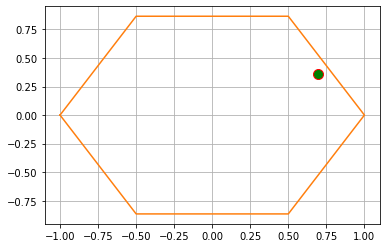

In [ ]:
P= choosepoint()
x = P[0]
y = P[1]
plt.grid()
plt.plot(x, y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.plot(xs,ys)#ploting my hexagon
plt.show()

(-0.1495019451857064, -0.4005809593288852)


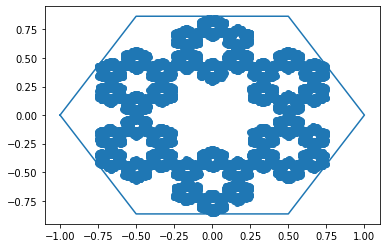

In [ ]:
# test with our function show

showshape(P)

We see that the shape is exactly the figure below whatever the original point.

# **Question 2:** Datascience with Pandas and Movie Data

0. Access some historical IMDB data files from the shared drive: 

https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing


In [ ]:
#importing the needed library

import pandas as pd
import zipfile
from google.colab import files
import io

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

Befor doing this, I created a shortcut to the shared folder on my drive. that is why i can acces it from there.

In [ ]:
!ls '/content/gdrive/My Drive/DSI_Pre_Assignment_2022'


In [ ]:
root_path = '/content/gdrive/My Drive/DSI_Pre_Assignment_2022'

In [ ]:
ls

1 Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.  


In [ ]:
basics = pd.read_csv('/content/gdrive/My Drive/DSI_Pre_Assignment_2022/title.basics.tsv.gz', compression='gzip',  sep='\t')
basics.head(10)

In [ ]:
akas = pd.read_csv('/content/gdrive/My Drive/DSI_Pre_Assignment_2022/title.akas.tsv.gz', compression='gzip',  sep='\t')
akas.head(10)

In [ ]:
ratings = pd.read_csv('/content/gdrive/My Drive/DSI_Pre_Assignment_2022/title.ratings.tsv.gz', compression='gzip',  sep='\t')
ratings.head(10)

2. Drop duplicates in all the dataframes, if there are any. 



In [ ]:
for data in [basics,akas,ratings] :
  print(len(data))

In [ ]:
# dropping ALL duplicate values
basics.drop_duplicates(keep='first',inplace=True)
akas.drop_duplicates(keep='first',inplace=True)
ratings.drop_duplicates(keep='first',inplace=True)


In [ ]:
for data in [basics,akas,ratings] :
  print(len(data))

3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe. 

   3.1 How many lines does the resulting dataframe have if you use an inner merge or outer  
   merge? Make sure you understand the difference. 


In [ ]:
akas2 = akas.rename(columns = {'titleId': 'tconst'}, inplace = False)
akas2.head(10)
# I changed the column name of akas

In [ ]:
## Inner merge
first = pd.merge(basics,
    akas2,
    how="inner",
    on='tconst',
    sort=False,
    copy=False,
)



In [ ]:
len(first)

In [ ]:
merged_inner = pd.merge(first,
    ratings,
    how="inner",
    on='tconst',
    sort=False,
    copy=False,
)

In [ ]:
len(merged_inner)

Inner merged means taking the intersection.

In [ ]:
## outer merge

second = pd.merge(basics,
    akas2,
    how="outer",
    on='tconst',
    sort=False,
    copy=False,
)

merged_outer = pd.merge(second,
    ratings,
    how="outer",
    on='tconst',
    sort=False,
    copy=False,
)

In [ ]:
len(merged_outer)

Outer means taking the union.

I do not know how to merge the three once so that is why I merged two dataframes twice.

 3.2 Using the unique() method, compute how many different 'titleTypes' there are 

In [ ]:
titletypes = merged_outer['titleType']

In [ ]:
pd.Series(pd.Categorical(titletypes)).unique()


So there are 10 types of title.

4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new. 


For the remaining part, I need to use the merged_inner data frame because we will need the ranking.

In [ ]:
region = merged_outer['region']

pd.Series(pd.Categorical(region)).unique()


In [ ]:
englishfilm=merged_inner.loc[(merged_inner['language'] == 'en') ]

In [ ]:
movie=merged_inner.loc[(merged_inner['titleType'] == 'movie') ]

In [ ]:
US=merged_inner.loc[(merged_inner['region'] == 'US') ]

In [ ]:
englishorus =  pd.merge(englishfilm,
    US,
    how="outer", #outer because the condion is or
    on='tconst',
    sort=False,
    copy=False,
)

In [ ]:
df_new = pd.merge(englishorus,
    movie,
    how="inner", #inner because the condion is AND
    on='tconst',
    sort=False,
    copy=False,
)

In [ ]:
len(df_new)

5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column. 


In [ ]:
import numpy as np


In [ ]:
df_new['log10Votes'] = np.log10( df_new['numVotes'])

In [ ]:
df_new.columns

6. Lower the case of all text in the 'genres' column. 

In [ ]:
df_new["genres"] = df_new["genres"].str.lower()


In [ ]:
df_new["genres"] 

6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

    6.1 mean number of log10Votes


In [ ]:
df_new.groupby('genres').log10Votes.mean().sort_values(ascending=False).head(10)

6.2 mean averageRating


In [ ]:
df_new.groupby('genres').averageRating.mean().sort_values(ascending=False).head(10)

7. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 


In [ ]:
My_data = pd.DataFrame(df_new.groupby('averageRating', as_index=False).log10Votes.mean())



In [ ]:
My_data

In [ ]:
ax1 = My_data.plot.scatter(x='averageRating',
                      y='log10Votes',
                      c='DarkBlue')


8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

    8.1 Using sklearn


In [ ]:
# I start by loading the sklearn library
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
len(My_data)

So as we have 91 rows, we will be using 61 for training and 30 for testing.

In order to have a good model, we need to shuffle the data prior to the building the model. Because, here our averageratings are sorted.

In [ ]:
from sklearn.utils import shuffle


In [ ]:
Shuffleddata = shuffle(My_data)


In [ ]:
ax1 = Shuffleddata.plot.scatter(x='averageRating',
                      y='log10Votes',
                      c='DarkBlue')


In [ ]:
# reshaping the data because we only have a single feature as X
My_data_X = np.array(Shuffleddata['averageRating'],  dtype=np.float32).reshape(-1, 1)
My_data_y= np.array(Shuffleddata['log10Votes'],  dtype=np.float32)


In [ ]:
My_data_X

In [ ]:
# Split the average_rating into training/testing sets
My_data_X_train = My_data_X[0:61]
My_data_X_test = My_data_X[61:]

In [ ]:
# Split the log10Votes into training/testing sets
My_data_y_train = My_data_y[0:61]
My_data_y_test = My_data_y[61:]

In [ ]:
type(My_data_X)

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(My_data_X_train, My_data_y_train)


In [ ]:
# Make predictions using the testing set
My_data_y_pred = regr.predict(My_data_X_test)


In [ ]:

# The coefficient
print("Coefficient: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(My_data_y_test, My_data_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(My_data_y_test, My_data_y_pred))

In [ ]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(My_data_X_test, My_data_y_test, color="black", label='original test data')
plt.plot(My_data_X_test, My_data_y_pred, color="blue", linewidth=3,  label='fitted line')
plt.scatter(My_data_X_train, My_data_y_train, color="red", linewidth=3, label='training data')
plt.legend()

plt.xticks(())
plt.yticks(())

plt.show()

 8.2 Using scipy 

In [ ]:
import scipy

In [ ]:
slope, intercept, r, p, se = scipy.stats.linregress(Shuffleddata, y=None)

In [ ]:
plt.plot(My_data_X, My_data_y, 'o', label='original data')
plt.plot(My_data_X, intercept + slope*My_data_X, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
slope, intercept

8.3 Using pytorch 

In [ ]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100 

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(My_data_X_train).cuda())
        labels = Variable(torch.from_numpy(My_data_y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(My_data_X_train))
        labels = Variable(torch.from_numpy(My_data_y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
# Testing 

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(My_data_X_test).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(My_data_X_test))).data.numpy()
    print(predicted)


In [ ]:
len(predicted)

In [ ]:
plt.scatter(My_data_X_test, My_data_y_test, color="black", label='original test data')
plt.plot(My_data_X_test, predicted, color="blue", linewidth=3,  label='fitted line')
plt.scatter(My_data_X_train, My_data_y_train, color="red", linewidth=3, label='training data')
plt.legend()

plt.xticks(())
plt.yticks(())

plt.show()

Ensure that you get the same result in each case (or explain why the results are different). You will need to install the corresponding packages. If you wanted to build a better regression model what would you do?  


In [ ]:
# Plotting all of the linear regression in one plot
plt.scatter(My_data_X_test, My_data_y_test, color="black", label='original test data')
plt.plot(My_data_X_test, predicted, color="blue", linewidth=3,  label='fitted line in pytorch')

plt.plot(My_data_X, intercept + slope*My_data_X, 'y', label='fitted line in scipy')
plt.plot(My_data_X_test, My_data_y_pred, color="green", linewidth=3,  label='fitted line in sklearn')

plt.scatter(My_data_X_train, My_data_y_train, color="red", linewidth=3, label='training data')
plt.legend()

plt.xticks(())
plt.yticks(())

plt.show()



The result is different because in scipy, we used all the data and we computed the slopes and the intercept traditionnally.

Instead, for pytorch and sklearn, we only use the train data and also, the coefficient are ajusted as long as the computation is going.



A model regression will be taking the average of the predicted value from the three models, as all three have pro and cons so using all of them will reduce errors.

9. You should commit at least three different versions of your notebook to your github account to demonstrate that you know the basics of using git for version control.

10. Share your notebook with us as a Google Colab notebook. Include your github account in your Colab notebook intro and make sure your commits are public. 
